## Compare do-it-yourself web page handling with pandas
<br>
The first few cells show increasingly fancy handling of data 
from the web<br>

### Bare bones basic: Read all data, print it, save nothing

In [1]:
# Version 0   - Read data, print it; nothing saved in a list

# Get Canadian fur trapping data
import urllib.request
url = 'http://robjhyndman.com/tsdldata/ecology1/hopedale.dat'
with urllib.request.urlopen(url) as webpage:
    for line in webpage:
        line = line.strip() # get rid of \n at end of line
        line = line.decode('utf-8') # 'decode' Unicode data
        print(line)

Coloured fox fur production, HOPEDALE, Labrador,, 1834-1925
#Source: C. Elton (1942) "Voles, Mice and Lemmings", Oxford Univ. Press
#Table 17, p.265--266
22
29
2
16
12
35
8
83
166
62
77
42
54
56
5
9
78
151
27
14
71
261
22
3
16
70
7
2
26
27
35
9
11
73
39
22
41
31
60
7
28
43
17
26
35
60
75
18
58
38
28
26
29
43
16
40
25
28
12
22
13
52
90
103
15
26
29
102
31
9
33
90
95
17
35
59
115
12
26
38
202
25
83
92
58
0
19
63
108
25
38
231


### Better: read data, skip non-numeric, save in a list

In [2]:
# Version 1.0 - 
#   Skip non-data lines, 
#   Read data lines, converting content to int
#   Store data read in list
#   Display data including year

import urllib.request
url = 'http://robjhyndman.com/tsdldata/ecology1/hopedale.dat'

fox_fur_pelts = []  # Store data here
skip_rows = 3 # skip past first 3 rows

with urllib.request.urlopen(url) as webpage:
    count = 0
    for line in webpage:
        count = count + 1
        if count > skip_rows:
            line = line.strip() # get rid of \n at end of line
            # 'decode' Unicode data
            line = line.decode('utf-8')
            # convert line to int
            number = int(line)           # convert string to number
            fox_fur_pelts.append(number) # Store data in list
        #
    #
#
year = 1834
for pelts in fox_fur_pelts:
    print(year, pelts)
    year = year + 1
#

1834 22
1835 29
1836 2
1837 16
1838 12
1839 35
1840 8
1841 83
1842 166
1843 62
1844 77
1845 42
1846 54
1847 56
1848 5
1849 9
1850 78
1851 151
1852 27
1853 14
1854 71
1855 261
1856 22
1857 3
1858 16
1859 70
1860 7
1861 2
1862 26
1863 27
1864 35
1865 9
1866 11
1867 73
1868 39
1869 22
1870 41
1871 31
1872 60
1873 7
1874 28
1875 43
1876 17
1877 26
1878 35
1879 60
1880 75
1881 18
1882 58
1883 38
1884 28
1885 26
1886 29
1887 43
1888 16
1889 40
1890 25
1891 28
1892 12
1893 22
1894 13
1895 52
1896 90
1897 103
1898 15
1899 26
1900 29
1901 102
1902 31
1903 9
1904 33
1905 90
1906 95
1907 17
1908 35
1909 59
1910 115
1911 12
1912 26
1913 38
1914 202
1915 25
1916 83
1917 92
1918 58
1919 0
1920 19
1921 63
1922 108
1923 25
1924 38
1925 231


### Fancy printing<br>
Just note that you can do numbers that align nicely, but it's a little quirky

In [7]:
# Version 2.0 - 
# Get Canadian fur trapping data into a list
# Uses fancy formatting for numbers

import urllib.request
url = 'http://robjhyndman.com/tsdldata/ecology1/hopedale.dat'

fox_fur_pelts = []
skip_rows = 3 # skip past first 3 rows

with urllib.request.urlopen(url) as webpage:
    count = 0
    for line in webpage:
        count = count + 1
        line = line.strip() # get rid of \n at end of line
        line = line.decode('utf-8') # 'decode' Unicode data

        if count < skip_rows:
            print(line)
        elif count == skip_rows:
            print(line, '\n') # extra blank line
        else:
            number = int(line)           # convert line str to int
            fox_fur_pelts.append(number) # save in list
        #
    #
#
# Make pelt count look nicer
#
year = 1834
print("Labrador fox pelts collected")
for pelts in fox_fur_pelts:
    print("{0:4d}  {1:6,d} fox pelts".format(year, pelts))
    year = year + 1
#
total = sum(fox_fur_pelts)
print("Total {0:6,d}".format(total))

Coloured fox fur production, HOPEDALE, Labrador,, 1834-1925
#Source: C. Elton (1942) "Voles, Mice and Lemmings", Oxford Univ. Press
#Table 17, p.265--266 

Labrador fox pelts collected
1834      22 fox pelts
1835      29 fox pelts
1836       2 fox pelts
1837      16 fox pelts
1838      12 fox pelts
1839      35 fox pelts
1840       8 fox pelts
1841      83 fox pelts
1842     166 fox pelts
1843      62 fox pelts
1844      77 fox pelts
1845      42 fox pelts
1846      54 fox pelts
1847      56 fox pelts
1848       5 fox pelts
1849       9 fox pelts
1850      78 fox pelts
1851     151 fox pelts
1852      27 fox pelts
1853      14 fox pelts
1854      71 fox pelts
1855     261 fox pelts
1856      22 fox pelts
1857       3 fox pelts
1858      16 fox pelts
1859      70 fox pelts
1860       7 fox pelts
1861       2 fox pelts
1862      26 fox pelts
1863      27 fox pelts
1864      35 fox pelts
1865       9 fox pelts
1866      11 fox pelts
1867      73 fox pelts
1868      39 fox pelts
1869      

# Get fox pelt data using pandas

In [33]:
# using pandas

# pandas does the kind of work you saw in previous code
# but pandas does it in a few lines

import pandas as pd
pd.options.display.max_rows = 100
url = 'http://robjhyndman.com/tsdldata/ecology1/hopedale.dat'
# --------------------------------------------------------------
# read data, convert, skip first 3 rows, put in a pelts column!
# --------------------------------------------------------------
fox_data = pd.read_csv(url, skiprows = 3,
                      header=None, names=['pelts'])

# Build a list of years with this shortcut ("List comprehension")
# You could instead start with an empty list and append to it
n = len(fox_data)
years_list = [year_data for year_data in range(1834, 1834 + n)]

# Add a column of year data to our fox_data 
fox_data['year'] = years_list
fox_data  # Display it

,pelts,year
0,22,1834
1,29,1835
2,2,1836
3,16,1837
4,12,1838
5,35,1839
6,8,1840
7,83,1841
8,166,1842
9,62,1843


## pandas selective retrieve big years

In [40]:
# using pandas

# pandas does the kind of work you saw in previous code
# but pandas does it in a couple of lines

import pandas as pd
pd.options.display.max_rows = 100
url = 'http://robjhyndman.com/tsdldata/ecology1/hopedale.dat'

fox_data = pd.read_csv(url, skiprows = 3,
                      header=None, names=['pelts'])

# Build a list of years with this shortcut ("List comprehension")
n = len(fox_data)
years_list = [year_data for year_data in range(1834, 1834 + n)]

# Add a column of data to our fox_data pandas "data frame"
fox_data['year'] = years_list

# -------------------------------------------------------
# Query data for years with lots of pelts
# -------------------------------------------------------
big_years = fox_data.query('pelts > 90')

print(sum(big_years['pelts']), 'pelts collected in big years')

# Display results of query
big_years

1626 pelts collected in big years


,pelts,year
8,166,1842
17,151,1851
21,261,1855
63,103,1897
67,102,1901
72,95,1906
76,115,1910
80,202,1914
83,92,1917
88,108,1922


# Plot fox pelt data read by pandas

    pelts  year
0      22  1834
1      29  1835
2       2  1836
3      16  1837
4      12  1838
5      35  1839
6       8  1840
7      83  1841
8     166  1842
9      62  1843
10     77  1844
11     42  1845
12     54  1846
13     56  1847
14      5  1848
15      9  1849
16     78  1850
17    151  1851
18     27  1852
19     14  1853
20     71  1854
21    261  1855
22     22  1856
23      3  1857
24     16  1858
25     70  1859
26      7  1860
27      2  1861
28     26  1862
29     27  1863
30     35  1864
31      9  1865
32     11  1866
33     73  1867
34     39  1868
35     22  1869
36     41  1870
37     31  1871
38     60  1872
39      7  1873
40     28  1874
41     43  1875
42     17  1876
43     26  1877
44     35  1878
45     60  1879
46     75  1880
47     18  1881
48     58  1882
49     38  1883
50     28  1884
51     26  1885
52     29  1886
53     43  1887
54     16  1888
55     40  1889
56     25  1890
57     28  1891
58     12  1892
59     22  1893
60     13  1894
61     5

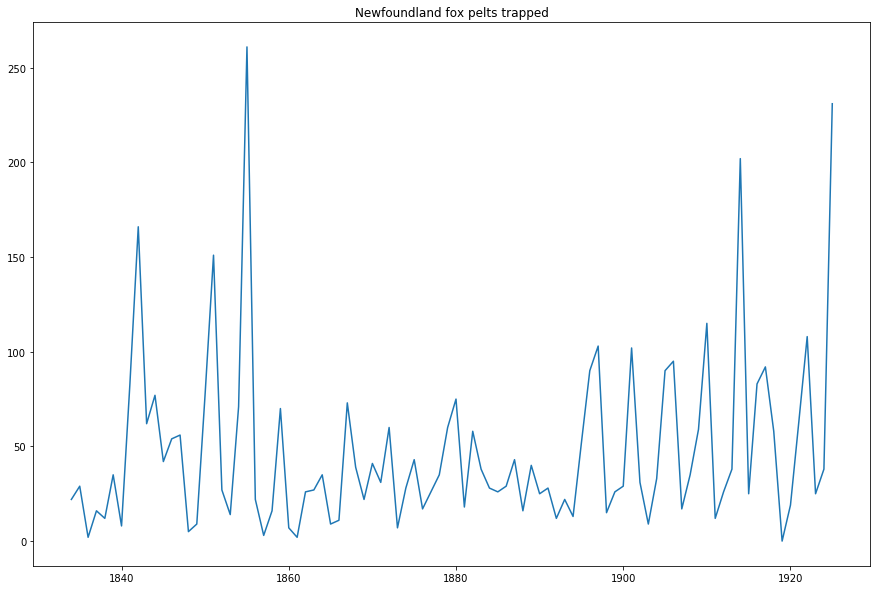

In [38]:
# using pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Use more of your screen for a plot (optional)
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

# Allow more rows to display, if needed (optional)
pd.options.display.max_rows = 100

# Read the data, convert text to numbers ...

url = 'http://robjhyndman.com/tsdldata/ecology1/hopedale.dat'
fox_data = pd.read_csv(url, 
                      skiprows = 3,
                      header=None,
                      names=['pelts'])

# Create a list of years
n = len(fox_data)
years_list = [yr for yr in range(1834,1834 + n)]

# Add column of years to fox_data
fox_data['year'] = years_list
print(fox_data)

#fox_data.plot('year', 'pelts', kind='line', 
#               title='Newfoundland fox pelts')

plt.plot(fox_data['year'], fox_data['pelts'])
plt.title('Newfoundland fox pelts trapped')
plt.show()